In [1]:
# Análisis de archivo Excel Galicia 
import pandas as pd

In [26]:
datos = pd.read_csv("C:/Users/m.pirela.escobar/OneDrive - Accenture/Galicia/GALICIA_MDM_DataMapping_v3.8 - ETL Mapping.csv", sep =',')

#datos = pd.read_excel("C:/Users/m.pirela.escobar/OneDrive - Accenture/Galicia/GALICIA_MDM_DataMapping_v3.8 - ETL Mapping.xls")
# Cambiar la ruta del archivo
#datos= datos.fillna('En Blanco')

datos.fillna({'Row filter': 'Blanco'}, inplace=True)

datos.head()

,Item Reference Number,Row filter,<Name> sort order,MDM table sort order,MDM attribute sort order,MDM table instance #,Attribute Name (Spanish),Attribute Name (English),Attribute Description,<Name> Staging Area \nElement Type,...,DM Comments,BA Comments,Sample Message Data,NV,L�gica?,SMART,L�gica?.1,GAMP,Observaci�n,Unnamed: 52
0,1.0,Title,0,0,0.0,1.0,<Name> Staging Area,NaN,NaN,NaN,...,Comments / Sample Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Title,0,MDM010,1.0,1.0,PERSON PARTY - A party can be either a <list p...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Defined,NaN,MDM010,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Not Used,NaN,MDM010,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Defined,NaN,MDM010,3.0,1.0,Idioma,NaN,Preferred Language,NaN,...,NaN,NaN,NaN,Hardcode 300,NaN,Hardcode 300,NaN,NaN,NaN,NaN


In [27]:
df = datos.copy()

## Tamaño del archivo

In [28]:
tamaño = print('El archivo tiene:', df.shape[0], 'filas,',  df.shape[1], 'columnas (incluyendo columnas ocultas)')

El archivo tiene: 1334 filas, 53 columnas (incluyendo columnas ocultas)


## Nombres de campos 

In [20]:
columns_names = df.columns.values
columnas = list(columns_names)
for campos in columnas:
    print(campos)

Item Reference Number
Row filter
<Name> sort order
MDM table sort order
MDM attribute sort order
MDM table instance #
Attribute Name (Spanish)
Attribute Name (English)
Attribute Description
<Name> Staging Area 
Element Type
<Name> Staging Area
Data Element Length
Element Required ?
System of Record ?
Searchable ?
Should be searchable?
Number of Occurrences
Default Value ?
Domain Values
Frequency of Data Change
Sample Data
Unnamed: 20
Business Rules / Dependencies
Data Transformation Rules
Data Conversion Type
Data Conversion Logic
Unnamed: 25
MDM Table Name
MDM Column Name
TableName.ColumnName
MDM Element Data Type
MDM Element Data Length
Required Field
Description
MDM Internal Field
Critical Data Element
Unnamed: 35
MDM Business Object Name
MDM XML Element Name
Dependencies
Code Table Name
Domain Value
Sample MDM Customer Data
Unnamed: 42
DM Comments
BA Comments
Sample Message Data
NV
L�gica?
SMART
L�gica?.1
Observaci�n
Unnamed: 51


## Distribución de datos según columna Row Filter

In [21]:
df2 = df.groupby(['Row filter']).count()
df2['Proportion %'] = (df2['Item Reference Number'] / (df2['Item Reference Number'].sum()))*100
df3 = df2[['Item Reference Number', 'NV', 'MDM table instance #', 'Required Field' , 'Critical Data Element', 'SMART', 'Proportion %']].copy()
df3

,Item Reference Number,NV,MDM table instance #,Required Field,Critical Data Element,SMART,Proportion %
Row filter,,,,,,,
Blanco,8,0,0,0,0,0,0.602864
Defined,214,75,185,101,23,75,16.126601
Extension,55,54,55,0,0,50,4.144687
Not Used,1025,0,1008,366,0,0,77.241899
Title,25,0,25,0,0,0,1.883949


<AxesSubplot:title={'center':'The title of my graph'}, xlabel='Row filter'>

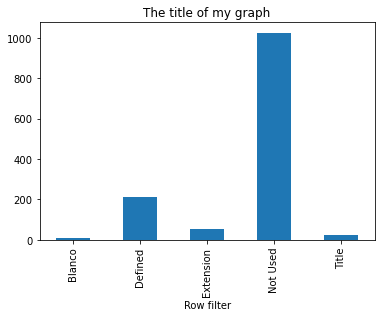

In [22]:
df3['Item Reference Number'].plot(kind='bar',stacked=True,title="The title of my graph")

## Datos en Row Filter = Defined

In [25]:
df_def = df[df['Row filter'] == 'Defined']
print('El archivo tiene:', df_def.shape[0], 'filas,',  df_def.shape[1], 'columnas')
df_defined = df_def[['Item Reference Number', 'Row filter', 'Attribute Name (Spanish)', 'Attribute Name (English)', 'Description', 'MDM Table Name', 'NV', 'SMART', 'Required Field', 
                     'MDM Internal Field', 'L�gica?', 'L�gica?.1']]

df_defined

#df_defined.to_csv("C:/Users/m.pirela.escobar/OneDrive - Accenture/Galicia/GALICIA_MDM_Filtro_Defined.csv")
#df_defined[df_defined['Item Reference Number'] == 279] # es un campo requerido, presenta una tabla asociad en MDM. Se encuentra en NV y SMART , ¿cuál es la fuente a elegir?

df_defined[df_defined['Item Reference Number'] == 320 ] #no es un campo requerido , sin embargo presenta una tabla e "internal field" asociados en MDM. 

El archivo tiene: 214 filas, 52 columnas


,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),Description,MDM Table Name,NV,SMART,Required Field,MDM Internal Field,L�gica?,L�gica?.1
368,320.0,Defined,NaN,NaN,"Transaction ID is a unique, system generated k...",CONTACTMETHOD,NaN,NaN,NaN,Y,NaN,NaN


## Datos en Row Filter = Defined agrupados según MDM Table Name

In [10]:
df_defined.groupby(['MDM Table Name']).count()

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),NV,SMART,Required Field,MDM Internal Field
MDM Table Name,,,,,,,,
ADDRESS,15,15,10,8,11,11,4,4
ADDRESSGROUP,6,6,1,1,1,1,4,5
CONTACT,17,17,8,6,11,11,7,8
CONTACTMETHOD,11,11,4,2,4,4,7,7
CONTACTMETHODGROUP,10,10,2,2,2,2,6,8
CONTACTREL,7,7,3,1,3,3,4,4
CONTEQUIV,7,7,2,2,2,2,4,5
CONTMACROROLE,7,7,0,0,1,1,5,6
GROUPING,9,9,2,1,3,3,6,6


## En general son datos personales y ligados a ubicación del cliente, y situación económica

## Datos en Row Filter = Title

In [11]:
df_tit = df[df['Row filter'] == 'Title']

df_title = df_tit[['Item Reference Number', 'Row filter', 'Attribute Name (Spanish)', 'Attribute Name (English)', 'MDM Table Name', 'NV', 'SMART', 'Required Field', 'MDM Internal Field']]

df_title
#df_defined[df_defined['Item Reference Number'] == 279

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),MDM Table Name,NV,SMART,Required Field,MDM Internal Field
0,1.0,Title,<Name> Staging Area,NaN,MDM Database,NaN,NaN,NaN,NaN
1,2.0,Title,PERSON PARTY - A party can be either a <list p...,NaN,NaN,NaN,NaN,NaN,NaN
29,30.0,Title,PERSON,NaN,NaN,NaN,NaN,NaN,NaN
63,47.0,Title,PERSON PARTY NAME - < name type >,NaN,NaN,NaN,NaN,NaN,NaN
90,74.0,Title,PERSON SEARCH,NaN,NaN,NaN,NaN,NaN,NaN
103,87.0,Title,ORGANIZATION PARTY - A party can be either a <...,NaN,NaN,NaN,NaN,NaN,NaN
128,112.0,Title,ORGANIZATION,NaN,NaN,NaN,NaN,NaN,NaN
163,122.0,Title,ORG PARTY NAME - <name type>,NaN,NaN,NaN,NaN,NaN,NaN
180,139.0,Title,PARTY ROLE - <role type>,NaN,NaN,NaN,NaN,NaN,NaN
202,161.0,Title,ADMIN SYSTEM KEY - Types:,NaN,NaN,NaN,NaN,NaN,NaN


## Datos en Row filter = Extension - registros que aparecen en rojo en archivo Excel

In [24]:
df_ext = df[df['Row filter'] == 'Extension']

df_extension = df_ext[['Item Reference Number', 'Row filter', 'Attribute Name (Spanish)', 'Attribute Name (English)', 'MDM Table Name', 'NV', 'SMART', 'Required Field',
                       'MDM Internal Field']]

df_extension

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),MDM Table Name,NV,SMART,Required Field,MDM Internal Field
46,46.001,Extension,Profesi�n,Profession,PERSON,NVT1301_PERSONA.COD_PROFESION,',NaN,NaN
47,46.002,Extension,Sucursal Madre,Home Branch,PERSON,NVT1313_R_PEROR_AD.ID_ORG_INT,',NaN,NaN
48,46.004,Extension,Condici�n Impositiva IVA,VAT condition,PERSON,NVT1301_PERSONA.COD_COND_IMPOS_IVA,',NaN,NaN
49,46.005,Extension,Condici�n Impositiva Ingresos Ganancias,Income Tax condition,PERSON,NVT1301_PERSONA.COD_COND_IMPOS_GAN,',NaN,NaN
50,46.006,Extension,Condici�n Impositiva Ingresos Brutos,Gross Income Tax condition,PERSON,NVT1301_PERSONA.COD_COND_IMPOS_IBR,',NaN,NaN
51,46.007,Extension,Jurisdicci�n Impositiva Ingresos Brutos (CODI...,Income Tax Jurisdiction,PERSON,NVT1301_PERSONA.COD_JURISD_IBR,',NaN,NaN
52,46.008,Extension,Provincia De Nacimiento,State of Birth,PERSON,' (Hoy no est� el campo en NV),',NaN,NaN
53,46.010,Extension,Ingreso Anual,Annual Income Amount,PERSON,NVR1301_persona.IMPR_INGR_ANUALES,',NaN,NaN
54,46.012,Extension,Situaci�n Laboral,Employment Type,PERSON,',',NaN,NaN
55,46.016,Extension,Pa�s Tributario,Country of Taxation,PERSON,NVT1324_DAT_COMER.COD_PAIS_TRIB_EX_1,',NaN,NaN


## No aparecen como campos requeridos sin embargo tienen tabla asociada en MDM.
### En general son datos financieros y relacionados a situación económica y laboral de cliente 

## Mostrar caso 244.002 y 244.006 "NVT1501_DIR_PERS.TXT_ENTRE_CALLES"

In [13]:
df_extension[(df_extension['Item Reference Number'] == 244.002) | (df_extension['Item Reference Number'] == 244.006)]

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),MDM Table Name,NV,SMART,Required Field,MDM Internal Field
287,244.002,Extension,Entre Calle 1,Between street and street,ADDRESS,NVT1501_DIR_PERS.TXT_ENTRE_CALLES,',NaN,NaN
290,244.006,Extension,Entre Calle 2,Between street and street,ADDRESS,NVT1501_DIR_PERS.TXT_ENTRE_CALLES,',NaN,NaN


## Datos en Row Filter = Not Used

In [14]:
df_nu = df[df['Row filter'] == 'Not Used']
df_notused = df_nu[['Item Reference Number', 'Row filter', 'Attribute Name (Spanish)', 'Attribute Name (English)', 'MDM Table Name', 'NV', 'SMART', 'Required Field', 'MDM Internal Field']]
df_notused

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),MDM Table Name,NV,SMART,Required Field,MDM Internal Field
3,4.000,Not Used,NaN,NaN,CONTACT,NaN,NaN,NaN,NaN
6,7.000,Not Used,NaN,NaN,CONTACT,NaN,NaN,NaN,NaN
7,8.000,Not Used,NaN,NaN,CONTACT,NaN,NaN,NaN,NaN
9,10.000,Not Used,NaN,NaN,CONTACT,NaN,NaN,NaN,NaN
10,11.000,Not Used,NaN,NaN,CONTACT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1315,1234.029,Not Used,Actividad Econ�mica (AFIP / Galicia),Detailed Economic Activities,XECOACTIVITYGROUP,NaN,NaN,NaN,NaN
1316,1234.030,Not Used,Prioridad Actividad Econ�mica,Economic Activities Priority,XECOACTIVITYGROUP,NaN,NaN,NaN,NaN
1317,1234.031,Not Used,NaN,NaN,XECOACTIVITYGROUP,NaN,NaN,NaN,NaN
1318,1234.032,Not Used,NaN,NaN,XECOACTIVITYGROUP,NaN,NaN,Y,NaN


## Registros con tabla asociada en MDM y no poseen equivalente NV o Smart, algunos aparecen como Required Field

In [15]:
df_notused[df_notused['Required Field'] == 'Y']

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),MDM Table Name,NV,SMART,Required Field,MDM Internal Field
91,75.000,Not Used,NaN,NaN,PERSONSEARCH,NaN,NaN,Y,NaN
92,76.000,Not Used,NaN,NaN,PERSONSEARCH,NaN,NaN,Y,NaN
93,77.000,Not Used,NaN,NaN,PERSONSEARCH,NaN,NaN,Y,NaN
98,82.000,Not Used,NaN,NaN,PERSONSEARCH,NaN,NaN,Y,NaN
100,84.000,Not Used,NaN,NaN,PERSONSEARCH,NaN,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...
1285,1230.000,Not Used,NaN,NaN,AGREEMENTSPECVAL,NaN,NaN,Y,NaN
1287,1232.000,Not Used,NaN,NaN,AGREEMENTSPECVAL,NaN,NaN,Y,NaN
1313,1234.027,Not Used,NaN,NaN,XECOACTIVITYGROUP,NaN,NaN,Y,NaN
1314,1234.028,Not Used,NaN,NaN,XECOACTIVITYGROUP,NaN,NaN,Y,NaN


### Ver casos Row Filter = En blanco

In [16]:
df_blk = df[df['Row filter'] == 'Blanco']
df_blanks = df_blk[['Item Reference Number', 'Row filter', 'Attribute Name (Spanish)', 'Attribute Name (English)', 'MDM Table Name', 'NV', 'SMART', 'Required Field', 'MDM Internal Field']]
df_blanks

,Item Reference Number,Row filter,Attribute Name (Spanish),Attribute Name (English),MDM Table Name,NV,SMART,Required Field,MDM Internal Field
511,459.0,Blanco,PAYMENT SOURCE,NaN,NaN,NaN,NaN,NaN,NaN
530,478.0,Blanco,PAYMENT SOURCE,NaN,NaN,NaN,NaN,NaN,NaN
718,663.0,Blanco,NaN,NaN,CONTRACT,NaN,NaN,NaN,NaN
739,684.0,Blanco,NaN,NaN,CONTRACTCOMPONENT,NaN,NaN,NaN,NaN
741,686.0,Blanco,NaN,NaN,CONTRACTCOMPONENT,NaN,NaN,NaN,NaN
1065,1010.0,Blanco,PAYMENT SOURCE,NaN,NaN,NaN,NaN,NaN,NaN
1262,1207.0,Blanco,ENTITYCONTENTREFERENCE,NaN,NaN,NaN,NaN,NaN,NaN
1331,1207.0,Blanco,DO NOT INSERT ROWS AFTER THIS ROW,NaN,NaN,NaN,NaN,NaN,NaN
1332,NaN,Blanco,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1333,NaN,Blanco,NaN,NaN,NaN,NaN,NaN,NaN,NaN
